In [9]:
from pathlib import Path
from xml.dom import minidom
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import SimpleITK as sitk

from tqdm import tqdm

import os
import shutil
import filecmp

from bs4 import BeautifulSoup

from landmarks_info import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = Path("c:\\Users\\fe0968\\Documents\\data\\medaka\\landmarks\\workshop_landmarks_selected\\")

In [21]:
path_alex = path / 'pointsets_alexey'
path_TT = path / 'Pointsets_803_4_TT'
path_JB = path / 'Pointsets_JB'
path_JB2 = path / 'Pointsets_JB2'

In [74]:
#participants

## Landmarks info

In [29]:


all_landmarks = [set_vert, set_fins, set_digest, set_heart, set_eyes, set_skull_front, set_skull_center, set_skull_end, set_brain]

landmarks_pointset_names = [x['file_name'] for x in all_landmarks]

print(landmarks_pointset_names)



['pointset1_vert', 'pointset2_fins', 'pointset3_digest', 'pointset4_heart', 'pointset5_eyes', 'pointset6_skull_front', 'pointset7_skull_center', 'pointset8_skull_end', 'pointset9_brain']


In [20]:
def print_landmark_comparison(landmark_set, landmark1, landmark2, landmark3, landmark4):
     
    #print('------------------------------------------------------------------------')
    print(landmark_set['name'])
    #print('------------------------------------------------------------------------')
    data = {'landmark': landmark_set['landmarks'],
           'AE vs TT': [get_distance(landmark1[i], landmark2[i]) for i in range(len(landmark_set['landmarks']))],
            'AE vs JB': [get_distance(landmark1[i], landmark3[i]) for i in range(len(landmark_set['landmarks']))],
            'TT vs JB': [get_distance(landmark2[i], landmark3[i]) for i in range(len(landmark_set['landmarks']))],
            'JB vs JB2': [get_distance(landmark3[i], landmark4[i]) for i in range(len(landmark_set['landmarks']))]
           }
    
    df = pd.DataFrame(data)
    return df

    ##print(df)
    ##print()
    ##print(df.describe())
    
def read_landmarks_all_three(landmark_set):
    land_ae = read_landmarks(path_alex / landmark_set['file_name'])
    land_tt = read_landmarks(path_TT / landmark_set['file_name'])
    land_jb = read_landmarks(path_JB / landmark_set['file_name'])
    land_jb2 = read_landmarks(path_JB2 / landmark_set['file_name'])

    return land_ae, land_tt, land_jb, land_jb2

def show_results(i):
    land_ae, land_tt, land_jb, land_jb2 = read_landmarks_all_three(all_landmarks[i])
    df = print_landmark_comparison(all_landmarks[i], land_ae, land_tt, land_jb, land_jb2)
    return df.round(1).style.pipe(make_pretty)
    return df.round(1).style.pipe(make_pretty)

def make_pretty(styler):
    #styler.set_caption("Weather Conditions")
    #styler.format(rain_condition)
    #styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=0, vmax=20, cmap="coolwarm")
    #styler.background_gradient(axis=None, cmap="coolwarm")
    return styler
    

def fix_files(file_list, old_name, new_name):
    
    if old_name in file_list:
        file_list[file_list.index(old_name)] = new_name
        if os.path.exists(data_path / old_name):
            print(old_name)
            os.rename(data_path / old_name, data_path / new_name)
    return file_list
    
def print_landmarks_count_for_pointsets():
    for land in all_landmarks:
        print(f"{land['file_name']}: {len(land['landmarks'])} landmarks")
    

In [6]:
print_landmarks_count_for_pointsets()

pointset1_vert: 7 landmarks
pointset2_fins: 4 landmarks
pointset3_digest: 2 landmarks
pointset4_heart: 4 landmarks
pointset5_eyes: 11 landmarks
pointset6_skull_front: 6 landmarks
pointset7_skull_center: 6 landmarks
pointset8_skull_end: 5 landmarks
pointset9_brain: 10 landmarks


## Preliminary Landmark Consistancy

In [342]:
show_results(0)

In [233]:
show_results(1)

Fins


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,Pectoral_dorsal most breast fin to body connection 1_right,8.800000,139.700000,136.900000,2.200000
1,Pectoral_dorsal most breast fin to body connection 2_left,12.100000,140.900000,140.400000,2.100000
2,Abdominal_fins back 1_right,15.600000,12.100000,6.500000,5.400000
3,Abdominal_fins back 2_left,7.500000,2.000000,5.800000,11.100000


In [234]:
show_results(2)

Digest


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,anus_Center,0.800000,15.500000,14.900000,1.200000
1,esophagus,4.900000,1.400000,5.300000,3.200000


In [235]:
show_results(3)

Heart


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,tip of bulbus arteriosus vessel inside,10.800000,1.100000,10.900000,1.800000
1,sinus venosus,54.700000,11.300000,45.700000,40.300000
2,apex of ventricle,7.000000,30.200000,37.000000,37.800000
3,anterior most point of ventricle,1.300000,3.200000,3.700000,0.200000


In [236]:
show_results(4)

Eyes


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,optic nerve head 1_right,4.100000,1.400000,5.500000,7.200000
1,optic nerve head 2_left,2.000000,6.300000,8.100000,8.200000
2,optic chiasm_crossing,6.200000,2.000000,7.100000,2.200000
3,most_anterior_right,7.600000,5.700000,1.900000,8.100000
4,most_anterior_lef,3.300000,6.300000,7.000000,7.800000
5,most_posterior_right,5.600000,1.100000,4.600000,1.300000
6,most_posterior_left,6.500000,3.200000,3.800000,2.900000
7,most_dorsal_right,2.900000,6.400000,6.800000,1.300000
8,most_dorsal_left,1.700000,7.300000,6.700000,3.000000
9,most_ventral_right,8.500000,4.100000,7.100000,8.700000


In [237]:
show_results(5)

Skull Front


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,ventral side of nostril outlet right,5.700000,3.900000,2.400000,1.700000
1,ventral side of nostril outlet left,1.000000,1.500000,1.600000,0.200000
2,dorsal side of nostril outlet right,1.200000,2.300000,1.500000,2.100000
3,dorsal side of nostril outlet left,2.200000,1.800000,2.300000,0.900000
4,mandible dentary,0.800000,11.700000,12.100000,3.700000
5,tongue tip,0.800000,1.000000,0.300000,1.000000
6,upper jaw channel,7.900000,6.700000,1.500000,3.300000
7,hyoid fusion,4.300000,3.600000,0.900000,3.200000


In [238]:
show_results(6)

Skull Center


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,subhypophysis bone,7.100000,8.600000,1.900000,5.200000
1,hyoid between branchial arches,2.200000,1.700000,0.800000,11.900000
2,split of afferent branchial artery 1,4.700000,3.600000,7.200000,2.100000
3,split of afferent branchial artery 2,3.700000,3.300000,6.800000,2.700000
4,split of afferent branchial artery 3,20.700000,4.000000,19.700000,2.000000
5,gills bone right,3.000000,1.000000,3.800000,4.000000
6,gills bone left,3.300000,1.300000,4.100000,4.100000


In [240]:
show_results(7)

Skull End


,landmark,AE vs TT,AE vs JB,TT vs JB,JB vs JB2
0,skull landmark A right,1.400000,2.700000,3.700000,14.700000
1,skull landmark A left,2.900000,2.100000,1.100000,17.400000
2,transition skull to spine,2.000000,3.400000,4.900000,3.700000
3,fusion of epibranchial artery 2,3.700000,11.400000,9.600000,3.700000
4,center of utricle right,9.100000,9.100000,1.200000,1.300000
5,center of utricle left,8.500000,8.300000,0.500000,1.200000


# MAIN ROUTINE

# Checking, Filtering, Evaluation

In [40]:
VERSION = 'v8'

data_path = Path(f'c:\\Users\\fe0968\\Documents\\Medaka\\inbredpanel_pointsets_{VERSION}\\inbredpanel_pointsets\\')
eval_path = Path(f'c:\\Users\\fe0968\\Documents\\Medaka\\evaluation\\{VERSION}\\')

In [11]:
copy_dir_list = ['part07_pointsets_CA', 'part08_pointsets_CA','part09_pointsets_CA', 'Part7_JF_1601', 'Part8_JF_1801', 
                 'results Part 1_skull center', 'results Part 2_skull center', 'results Part 2_skull front', 'results Part 3_eye',
                'results Part 3_skull_front', 'results_Part 1_skull_front', 'results_Part1_eye', 'results_Part2_eye', 'results Part 1 skull end',
                 'results Part 2 skull end','results Part 3 skull center','results Part 3 skull end',
                'part 10, VERT', 'part 11, VERT', 'part 12, VERT', 'Part9_JF_2601',
                'Part 10 BRAIN',
'Part 10 Skull_center',
'Part 10 Skull_end',
'Part 10 Skull_Front',
'Part 11 Brain',
'Part 11 Skull_center',
'Part 11 Skull_end',
'Part 11 Skull_Front',
'Part 12 Brain',
'Part 12 Skull_centrer',
'Part 12 Skull_end',
'Part 12 Skull_front',
                 
'Part 10 Digest', # V8  
'Part 10 heart',
'part 10, EYES',
'part 10, FINS',
'Part 11 Digest',
'Part 11 Heart',
'part 11, EYES',
'part 11, FINS',
'Part 12 Digest',
'Part 12 Heart',
'part 12, EYES',
'part 12, FINS',
'part07_pointsets',
'part08_pointsets',
'part09_pointsets']


In [12]:
new_folder_files =  os.listdir(data_path)

for f in new_folder_files:
    if os.path.isdir(data_path / f) and f not in copy_dir_list:
        print(f)

1559_JF_2302
1588
Edit after last_vert
part13_pointsets
part13_pointsets_CA
pointsets_1507


In [13]:
print('WARNING: Edit after last_vert directory is skipped for now')

### Copy files from subdirectories into the main directory

In [14]:
# Copy subfolders

print('Before copy:', len(os.listdir(data_path)))

for d in copy_dir_list:
    #shutil.copytree(data_path / d, data_path, dirs_exist_ok=False)
    
    # fetch all files
    for file_name in os.listdir(data_path / d):
        # construct full file path
        source = data_path / d  / file_name
        destination = data_path / file_name
        # copy only files
        if os.path.isfile(source):
            shutil.copy(source, destination)
            #print('copied', file_name)
    
print('After copy:', len(os.listdir(data_path)))

Before copy: 4203
After copy: 4204


In [15]:
files = os.listdir(data_path)
files = [f for f in files if os.path.isfile(data_path / f)]
len(files)

4149

## Filtering 1: Delete duplicates. Files with (1) in the name

In [16]:

duplicates = []
same_name_diff_content = []

for f in files:
    if '(1)' in f:
        if filecmp.cmp(data_path / f, data_path / f.replace(' (1)', '')):
            duplicates.append(f)
        else:
            same_name_diff_content.append(f)
            
            
print('Duplicates:', len(duplicates))
        
        
filtered_files = [x for x in files if (x not in duplicates)]
print('New:', len(filtered_files))

print()
print('-----------------------------------------------')
print('WARNING. Same name, different content', same_name_diff_content)
print('-----------------------------------------------')

filtered_files = [x for x in filtered_files if (x not in same_name_diff_content)]
print('New:', len(filtered_files))

Duplicates: 91
New: 4058

-----------------------------------------------
WARNING. Same name, different content ['1064_pointset1_vert_JO (1).mps', '853_PointSet6_Skull_Front_VC (1).mps']
-----------------------------------------------
New: 4056


In [17]:
manual_exceptions = ['.DS_Store', 'PointSet3_Digest.mps', 'PointSet4_Heart.mps', 'PointSet9_brain.mps', '1370_pointset2_fins.mps', 
                     '961_pointset2_fins.mps', '954_pointset9_brain.mps', '804_pointset6_skull_front.mps',
                    '811_pointset8_skull_end.mps']
manual_exceptions = [x.lower() for x in manual_exceptions]

filtered_files = [x for x in filtered_files if (x.lower() not in manual_exceptions)]
print('New:', len(filtered_files))

New: 4048


In [18]:
landmarks_exclusion_list = ['Vert_Last_Center']

In [23]:
filtered_files = fix_files(filtered_files, '1265PointSet3_Digest_VC.mps', '1265_PointSet3_Digest_VC.mps')
filtered_files = fix_files(filtered_files, '1274pointset6_skull_front_JO.mps', '1274_pointset6_skull_front_JO.mps')
filtered_files = fix_files(filtered_files, '1300_ointSet3_Digest_VC.mps', '1300_PointSet3_Digest_VC.mps')
filtered_files = fix_files(filtered_files, '1300PointSet4_Heart_VC.mps', '1300_PointSet4_Heart_VC.mps')
filtered_files = fix_files(filtered_files, '1300_PointSet2_Vert_CS.mps', '1300_PointSet1_Vert_CS.mps')
filtered_files = fix_files(filtered_files, '876_PointSet3-Digest_VC.mps', '876_PointSet3_Digest_VC.mps')
filtered_files = fix_files(filtered_files, '979PointSet8_Skull_End_VC.mps', '979_PointSet8_Skull_End_VC.mps')
filtered_files = fix_files(filtered_files, '1075_pointset8_skull_endLucie.mps', '1075_pointset8_skull_end_lucie.mps')
filtered_files = fix_files(filtered_files, '804_ointset7_skull_center_Lucie.mps', '804_pointset7_skull_center_Lucie.mps')

In [26]:
filtered_files = fix_files(filtered_files, '640_PointSet2_Fins1_ASt.mps', '640_PointSet2_Fins_ASt.mps')
filtered_files = fix_files(filtered_files, '11499_PointSet4_Heart_ES.mps', '1149_PointSet4_Heart_ES.mps')

In [27]:
samples = []
points = []
names = []

for f in filtered_files:
    
    s = f.split('_')
    samples.append(s[0])
    names.append(s[-1][:-4].lower())
    #points.append(s[1])
    points.append(f.replace(f'{s[0]}_', '').replace(f'_{s[-1]}', '').lower())
    
data = {'sample': samples,
        'point_set': points,
       'name': names}


print('Unique samples:', len(set(samples)))
print(set(samples))

print()

print('Unique pointsets:', len(set(points)))
print(set(points))

print()

print('Unique names:', len(set(names)))
print(set(names))
    

Unique samples: 236
{'692', '837', '1389', '811', '528', '819', '582', '710', '531', '912', '603', '865', '951', '1226', '1396', '956', '1296', '418', '1295', '1192', '511', '1100', '1529', '724', '1104', '1405', '909', '947', '639', '604', '707', '699', '954', '1584', '448', '1075', '470', '471', '1106', '873', '972', '463', '1391', '537', '423', '1284', '721', '1372', '961', '1551', '502', '1269', '1119', '974', '978', '1393', '1366', '626', '816', '859', '489', '619', '906', '1230', '1557', '684', '1353', '854', '1383', '805', '1575', '459', '1417', '1227', '1219', '838', '800', '421', '444', '561', '831', '834', '1346', '1423', '454', '488', '425', '1370', '879', '1293', '622', '526', '629', '971', '1337', '1351', '1115', '1395', '610', '870', '1170', '807', '1524', '1378', '814', '1413', '493', '960', '417', '1414', '1086', '1216', '1181', '1418', '1191', '586', '640', '1401', '428', '946', '1264', '1369', '1406', '801', '1292', '500', '919', '846', '1274', '652', '1126', '1197', 

In [30]:
print(landmarks_pointset_names)

print()
print('-----------------------------------------------')
print('WARNING: Problematic naming')
print('-----------------------------------------------')
print([p for p in points if p not in landmarks_pointset_names])

print('Based on pointset names')
print([samples[points.index(p)] + '_' + points[points.index(p)] + '_' + names[points.index(p)]   for p in points if p not in landmarks_pointset_names])


print('Based on names')
print([samples[names.index(p)] + '_' + points[names.index(p)] + '_' + names[names.index(p)]   for p in names if p not in participants])
    
# TODO: Make a list of exact file names to check manually


['pointset1_vert', 'pointset2_fins', 'pointset3_digest', 'pointset4_heart', 'pointset5_eyes', 'pointset6_skull_front', 'pointset7_skull_center', 'pointset8_skull_end', 'pointset9_brain']

-----------------------------------------------
-----------------------------------------------
[]
Based on pointset names
[]
Based on names
[]


In [33]:
people = set(names)
print(people)

print('-----------------------------------------------')
print('WARNING: Problematic names')
print('-----------------------------------------------')
for p in people:
    if p not in participants:
        print('Problematic name: ', p)
        print('Count:', names.count(p))
        print([samples[i] + '_' + points[i] + '_' + names[i] + '.mps' for i, x in enumerate(names) if x == p])

{'lucie', 'ast', 'jvm', 'ttt', 'cs', 'ra', 'kp', 'jo', 'bew', 'jf', 'es', 'tc', 'pw', 'jb', 'rs', 'tt', 'kk', 'ca', 'vc'}
-----------------------------------------------
-----------------------------------------------


In [96]:
[i for i, x in enumerate(names) if x == 'fins']

[799, 1740]

## Make a data frame

In [32]:
df = pd.DataFrame(data)
df

,sample,point_set,name
0,1064,pointset1_vert,jo
1,1064,pointset1_vert,jvm
2,1064,pointset2_fins,jo
3,1064,pointset2_fins,jvm
4,1064,pointset3_digest,kk
...,...,...,...
4043,979,pointset7_skull_center,vc
4044,979,pointset8_skull_end,ra
4045,979,pointset8_skull_end,vc
4046,979,pointset9_brain,cs


In [34]:
df["sample"] = pd.to_numeric(df["sample"])

In [35]:
print(len(df[df['sample']>1500]))
df = df.drop(df[df['sample']>1500].index)
df

98


,sample,point_set,name
0,1064,pointset1_vert,jo
1,1064,pointset1_vert,jvm
2,1064,pointset2_fins,jo
3,1064,pointset2_fins,jvm
4,1064,pointset3_digest,kk
...,...,...,...
4043,979,pointset7_skull_center,vc
4044,979,pointset8_skull_end,ra
4045,979,pointset8_skull_end,vc
4046,979,pointset9_brain,cs


## Participants stats

In [45]:
print(f'Current status. Version {VERSION}')
for name in res.index:
    print(f"{participants_names[name]} ({name}): {round(res.loc[name]['point_set'] / (participants_pointset_count[name]*60) * 100 ,1)}% done")
    #print(res.loc[name]['point_set'])

Current status. Version v8


NameError: name 'res' is not defined

Current status
Anna-Sophia (ast): 23.3% done
Bettina (bew): 100.0% done
Cassian (ca): 100.0% done
Christina (cs): 100.0% done
Encarnacion (es): 70.0% done
Joergen (jb): 53.3% done
Jana (jf): 100.0% done
Jasmin (jo): 99.7% done
Javier (jvm): 100.0% done
Kristaps (kk): 100.0% done
Kaisa (kp): 100.0% done
Lucie  (lucie): 97.9% done
Rashi (ra): 100.0% done
Risa (rs): 100.0% done
Tiago  (tc): 100.0% done
Thomas (tt): 71.7% done
Tina (ttt): 100.0% done
Valerie (vc): 91.7% done

In [215]:
df[df['name'] == 'jo']['point_set'].unique()

array(['pointset1_vert', 'pointset2_fins', 'pointset6_skull_front',
       'pointset7_skull_center', 'pointset8_skull_end'], dtype=object)

## Pointset stats

In [37]:
total_samples = 74*3

for p in landmarks_pointset_names:
    total = len(df[df['point_set'] == p]['sample'])
    uniq = len(df[df['point_set'] == p]['sample'].unique())
    print(f"{p}: total {total}, unique {uniq}. finished: {round(total / (total_samples * 2) * 100, 1)} %")

pointset1_vert: total 445, unique 222. finished: 100.2 %
pointset2_fins: total 444, unique 223. finished: 100.0 %
pointset3_digest: total 444, unique 222. finished: 100.0 %
pointset4_heart: total 443, unique 223. finished: 99.8 %
pointset5_eyes: total 401, unique 222. finished: 90.3 %
pointset6_skull_front: total 441, unique 222. finished: 99.3 %
pointset7_skull_center: total 444, unique 223. finished: 100.0 %
pointset8_skull_end: total 444, unique 222. finished: 100.0 %
pointset9_brain: total 444, unique 222. finished: 100.0 %


pointset1_vert: total 360, unique 180. finished: 81.1 %
pointset2_fins: total 320, unique 181. finished: 72.1 %
pointset3_digest: total 270, unique 160. finished: 60.8 %
pointset4_heart: total 270, unique 160. finished: 60.8 %
pointset5_eyes: total 219, unique 160. finished: 49.3 %
pointset6_skull_front: total 299, unique 160. finished: 67.3 %
pointset7_skull_center: total 241, unique 160. finished: 54.3 %
pointset8_skull_end: total 198, unique 156. finished: 44.6 %
pointset9_brain: total 168, unique 159. finished: 37.8 %

In [102]:
print(len(df[df['point_set'] == 'pointset9_brain']['sample'].unique()))
print(len(df[df['point_set'] == 'pointset9_brain']['sample']))

222
444


In [272]:
p = 'pointset2_fins'
df_pointset = df[(df['point_set'] == p) & (df['name'] == 'jo')]
#df_pointset
    

## Corrections: Check the number of provided landmarks for each pointset

In [48]:

for n in participants:
    
    #n = 'ttt'

    print('')
    print('-----------------------')
    print(f"Name: {participants_names[n]} ({n})")
    print('-----------------------')

    for pointset in all_landmarks:

        #pointset = all_landmarks[1]

        #print(pointset)

        df_pointset = df[(df['point_set'] == pointset['file_name']) & (df['name'] == n)]
        
        if len(df_pointset) == 0:
            continue
        
        

        p_list = pointset['landmarks']

        print()
        print(f"Pointset: {pointset['file_name']}")

        problems = False

        for i in df_pointset.index:

            sample = df_pointset.loc[i]['sample']
            pointset = df_pointset.loc[i]['point_set']
            name = df_pointset.loc[i]['name']

            fname = f"{sample}_{pointset}_{name}.mps"
            #print(f"{df_pointset.loc[i]['sample']}_{df_pointset.loc[i]['point_set']}_{df_pointset.loc[i]['name']}.mps")

            land = read_landmarks(data_path / fname)

            if len(land) != len(p_list):
                problems = True
                print(f"CORRECTION: '{fname}': Expected {len(p_list)} landmarks. Got {len(land)}")

        if not problems:
            print('OK')
        
            
            


-----------------------
Name: Cassian (ca)
-----------------------

Pointset: pointset6_skull_front
OK

Pointset: pointset7_skull_center
OK

Pointset: pointset8_skull_end
OK

Pointset: pointset9_brain
OK

-----------------------
Name: Jana (jf)
-----------------------

Pointset: pointset3_digest
OK

Pointset: pointset4_heart
OK

Pointset: pointset5_eyes
OK

-----------------------
Name: Tiago  (tc)
-----------------------

Pointset: pointset1_vert
CORRECTION: '803_pointset1_vert_tc.mps': Expected 7 landmarks. Got 2

Pointset: pointset2_fins
OK

-----------------------
Name: Christina (cs)
-----------------------

Pointset: pointset1_vert
OK

Pointset: pointset2_fins
CORRECTION: '890_pointset2_fins_cs.mps': Expected 4 landmarks. Got 2

Pointset: pointset9_brain
OK

-----------------------
Name: Rashi (ra)
-----------------------

Pointset: pointset5_eyes
OK

Pointset: pointset6_skull_front
OK

Pointset: pointset7_skull_center
OK

Pointset: pointset8_skull_end
OK

----------------------

## Check variation in landmarks

In [38]:
def estimate_variance(df, pointset):
    
    df_pointset = df[(df['point_set'] == pointset['file_name'])]
    print('-----------------------------')
    print(pointset['name'])
    print('-----------------------------')
    
    samples_list = set(df_pointset['sample'].tolist())
    #print(samples_list)

    count_pairs  = 0
    count_diff_size = 0
    
    res = []
    
    sample_list = []
    pointset_list = []
    user1_list = []
    user2_list = []
    res_list = []
    landmark_list = []

    for s in samples_list:
        #s = '1064'

        df_sample = df_pointset[df_pointset['sample']== s]
        #df_sample


        if len(df_sample) == 2:
            names = df_sample['name'].tolist() 

            fname1 = f"{s}_{pointset['file_name']}_{names[0]}.mps"
            fname2 = f"{s}_{pointset['file_name']}_{names[1]}.mps"


                #print(f"{df_pointset.loc[i]['sample']}_{df_pointset.loc[i]['point_set']}_{df_pointset.loc[i]['name']}.mps")

            land1 = read_landmarks(data_path / fname1)
            land2 = read_landmarks(data_path / fname2)

            if (len(land1) != len(land2)):
                #print(s, len(land1), len(land2))
                count_diff_size = count_diff_size + 1
                continue
                
            if pointset['file_name'] == 'pointset5_eyes':
                if land1[0][0] > land1[1][0]: print('LR Problem')
                if land1[3][0] > land1[3][0]: print('LR Problem')
                if land1[5][0] > land1[6][0]: print('LR Problem')
                if land1[7][0] > land1[8][0]: print('LR Problem')
                if land1[9][0] > land1[10][0]: print('LR Problem')
                
                if land2[0][0] > land2[1][0]: print('LR Problem')
                if land2[3][0] > land2[3][0]: print('LR Problem')
                if land2[5][0] > land2[6][0]: print('LR Problem')
                if land2[7][0] > land2[8][0]: print('LR Problem')
                if land2[9][0] > land2[10][0]: print('LR Problem')
                
            # NEW: For all landmarks
            for i in range(len(pointset['landmarks'])):
                
                if pointset['landmarks'][i] in landmarks_exclusion_list:
                    continue
                       
                comp = get_distance(land1[i], land2[i])
                
                sample_list.append(s)
                pointset_list.append(pointset['file_name'])
                user1_list.append(names[0])
                user2_list.append(names[1])
                landmark_list.append(pointset['landmarks'][i])
                res_list.append(comp)            
            
            # Old
            m = [get_distance(land1[i], land2[i]) for i in range(len(pointset['landmarks']))]
            #print(m)
            res.append(m)

            #print(s, names)
            count_pairs=count_pairs+1

            if names[0] == names[1]:
                print('WARNING: The same names')

    print('Pairs:',count_pairs)
    print('Inconsistent number of landmarks. Skipped. To correct:',count_diff_size)
    print('')
    
    res = np.array(res)
    
    # Print stats
    print('--- Summary ---')
    for i in range(len(pointset['landmarks'])):
        
        pointset_name = pointset['landmarks'][i]
        avg = round(np.mean(res[:,i]),1)
        std = round(np.std(res[:,i]),1)
        max_v = round(np.max(res[:,i]),1)
        min_v = round(np.min(res[:,i]),1)
        
        print(f"{pointset_name}: {avg} \u00B1 {std}. max: {max_v}, min: {min_v}")
        #print(f"{pointset['landmarks'][i]}. mean: {round(np.mean(res[:,i]),1)}, std: {round(np.std(res[:,i]),1)}")
        
    print()
    
    data = {'sample': sample_list,
           'point_set': pointset_list,
            'landmark': landmark_list,
            'name1': user1_list,
            'name2': user2_list,
            'result': res_list      
           }
    
    res_df = pd.DataFrame(data)
    
    return res_df


    

## Evaluate pointset 

In [50]:

#res_df = estimate_variance(df, all_landmarks[4]) # Eyes
#res_df = estimate_variance(df, all_landmarks[3]) # Heart
#res_df = estimate_variance(df, all_landmarks[1]) # Fins
#res_df = estimate_variance(df, all_landmarks[5]) # Fins
res_df = estimate_variance(df, all_landmarks[0]) # Vert

-----------------------------
Vert
-----------------------------
Pairs: 178
Inconsistent number of landmarks. Skipped. To correct: 0

--- Summary ---
Transition skull to spine: 4.8 ± 3.2. max: 16.9, min: 0.3
Vert1: 2.6 ± 5.7. max: 44.3, min: 0.2
Vert2: 2.9 ± 7.4. max: 63.2, min: 0.2
Vert3: 3.3 ± 10.0. max: 103.8, min: 0.1
Vert4: 3.4 ± 10.9. max: 118.5, min: 0.2
Vert5: 3.5 ± 11.2. max: 124.3, min: 0.2
Vert_Last_Center: 440.2 ± 867.5. max: 2602.5, min: 0.0



## Make evaluation tables for ALL pointsets

In [41]:
for i in range(len(all_landmarks)):
    res_df = estimate_variance(df, all_landmarks[i])
    res_df.sort_values('result', ascending=False)
    res_df.to_excel(eval_path / f"eval_{all_landmarks[i]['file_name']}_v8.xlsx")
    
print('Finished')

-----------------------------
Vert
-----------------------------
Pairs: 219
Inconsistent number of landmarks. Skipped. To correct: 1

--- Summary ---
Transition skull to spine: 4.7 ± 3.2. max: 17.7, min: 0.3
Vert1: 2.6 ± 6.2. max: 52.7, min: 0.1
Vert2: 3.1 ± 7.9. max: 63.2, min: 0.2
Vert3: 3.9 ± 11.5. max: 103.8, min: 0.1
Vert4: 4.1 ± 12.0. max: 118.5, min: 0.2
Vert5: 4.2 ± 12.3. max: 124.3, min: 0.1
Vert_Last_Center: 529.5 ± 938.2. max: 2602.5, min: 0.0

-----------------------------
Fins
-----------------------------
Pairs: 217
Inconsistent number of landmarks. Skipped. To correct: 2

--- Summary ---
Pectoral_dorsal most breast fin to body connection 1_right: 20.4 ± 18.5. max: 138.7, min: 1.5
Pectoral_dorsal most breast fin to body connection 2_left: 25.4 ± 63.2. max: 915.8, min: 1.3
Abdominal_fins back 1_right: 16.1 ± 8.4. max: 70.5, min: 0.0
Abdominal_fins back 2_left: 28.4 ± 126.4. max: 1508.7, min: 0.0

-----------------------------
Digest
-----------------------------
Pairs: 210

## Make Table with ALL results

In [43]:
def make_results_table(df, save = True, file_name = 'results_landmarks.xlsx'):
    
    sample_list = []
    pointset_list = []
    user_list = []
    landmark_list = []
    x_list = []
    y_list = []
    z_list = []
        
    for pointset in all_landmarks:
    
        df_pointset = df[(df['point_set'] == pointset['file_name'])]
        print('-----------------------------')
        print(pointset['name'])
        print('-----------------------------')

        samples_list = set(df_pointset['sample'].tolist())
        #print(samples_list)

        
        for s in samples_list:
            #s = '1064'

            df_sample = df_pointset[df_pointset['sample']== s]
            #df_sample
            
            names = df_sample['name'].tolist()
            
            for name in names:

                fname = f"{s}_{pointset['file_name']}_{name}.mps"

                #print(f"{df_pointset.loc[i]['sample']}_{df_pointset.loc[i]['point_set']}_{df_pointset.loc[i]['name']}.mps")

                land = read_landmarks(data_path / fname)
                
                if len(land) != len(pointset['landmarks']):
                    print(f"Inconsistent landmarks count: {len(land)} and {len(pointset['landmarks'])}")
                    continue

                # New
                for i in range(len(pointset['landmarks'])):
                    
                    if pointset['landmarks'][i] in landmarks_exclusion_list:
                        continue
    
                    sample_list.append(s)
                    pointset_list.append(pointset['file_name'])
                    user_list.append(name)
                    landmark_list.append(pointset['landmarks'][i])
                    x_list.append(land[i][0])            
                    y_list.append(land[i][1])
                    z_list.append(land[i][2])


    data = {'sample': sample_list,
           'point_set': pointset_list,
            'landmark': landmark_list,
            'name': user_list,
            'x': x_list,      
            'y': y_list,
            'z': z_list,
           }

    res_df = pd.DataFrame(data)
    
    if save:
        res_df.to_excel(file_name)
    
    return res_df



In [44]:
df_all_res = make_results_table(df, file_name = f'results_landmarks_{VERSION}.xlsx')
df_all_res

-----------------------------
Vert
-----------------------------
Inconsistent landmarks count: 6 and 7
Inconsistent landmarks count: 2 and 7
Inconsistent landmarks count: 2 and 7
-----------------------------
Fins
-----------------------------
Inconsistent landmarks count: 2 and 4
Inconsistent landmarks count: 2 and 4
-----------------------------
Digest
-----------------------------
Inconsistent landmarks count: 0 and 2
Inconsistent landmarks count: 0 and 2
Inconsistent landmarks count: 0 and 2
Inconsistent landmarks count: 0 and 2
Inconsistent landmarks count: 3 and 2
Inconsistent landmarks count: 0 and 2
Inconsistent landmarks count: 1 and 2
Inconsistent landmarks count: 0 and 2
-----------------------------
Heart
-----------------------------
Inconsistent landmarks count: 6 and 4
-----------------------------
Eyes
-----------------------------
Inconsistent landmarks count: 10 and 11
Inconsistent landmarks count: 3 and 11
-----------------------------
Skull Front
-------------------

,sample,point_set,landmark,name,x,y,z
0,526,pointset1_vert,Transition skull to spine,kp,293.000000,282.826248,955.343394
1,526,pointset1_vert,Vert1,kp,289.983033,251.199781,986.170074
2,526,pointset1_vert,Vert2,kp,293.638389,233.759151,1013.763606
3,526,pointset1_vert,Vert3,kp,294.000000,226.785634,1050.797902
4,526,pointset1_vert,Vert4,kp,296.621422,223.064777,1095.812249
...,...,...,...,...,...,...,...
23355,511,pointset9_brain,OT_rightmost,pw,173.000003,236.560874,654.491076
23356,511,pointset9_brain,OT_leftmost,pw,364.000005,236.560874,650.138201
23357,511,pointset9_brain,cerebellum,pw,274.262913,191.952753,706.000000
23358,511,pointset9_brain,OT cerebellum torus,pw,267.927534,203.061912,657.787682


## Visualize errors

In [36]:
volumes_path = Path('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\test\\')
res_path = Path('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\test\\')

dataset = '1064'
sitk_image = sitk.ReadImage(volumes_path / f'{dataset}.tif')

In [37]:
im = sitk.GetArrayViewFromImage(sitk_image)

In [38]:
#fname = f"{s}_{pointset['file_name']}_{name}.mps"

fname1 = f"1064_pointset1_vert_JO.mps"
fname2 = f"1064_pointset1_vert_JVM.mps"

#print(f"{df_pointset.loc[i]['sample']}_{df_pointset.loc[i]['point_set']}_{df_pointset.loc[i]['name']}.mps")

landmark_name = 'Vert1'

land_ind = set_vert['landmarks'].index(landmark_name)

land = read_landmarks(data_path / fname1)
land2 = read_landmarks(data_path / fname2)

scale = 0.5

x = math.floor(land[land_ind][0] * scale)
y = math.floor(land[land_ind][1] * scale)
z = math.floor(land[land_ind][2] * scale)

import random

x2 = math.floor(land2[land_ind][0] * scale) + random.randint(-20,20)
y2 = math.floor(land2[land_ind][1] * scale) + random.randint(-20,20)
z2 = math.floor(land2[land_ind][2] * scale) + random.randint(-20,20)

print(land[land_ind])
print(x,y,z)
print(x2,y2,z2)

[426.68527946 318.24754659 907.56993833]
213 159 453
197 179 434


In [44]:
def make_landmarks_comparison_figure(im, land1, land2, landmark_name, name1, name2, color1 = 'red', color2 = 'blue'):

    marker_size = 5
    marker_alpha = 0.7
    line_width = 0.5

    x = land1[0]
    y = land1[1]
    z = land1[2]
    
    x2 = land2[0]
    y2 = land2[1]
    z2 = land2[2]
    
    diff = round(get_distance(land1, land2),1)

    fig = plt.figure(figsize= (13,11), layout="tight")

    gs = GridSpec(4, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[2,0])
    ax4 = fig.add_subplot(gs[3, 0])
    ax5 = fig.add_subplot(gs[0:2, 1])
    ax6 = fig.add_subplot(gs[2:4, 1])

    for i, ax in enumerate(fig.axes):
        ax.set_xticks([])
        ax.set_yticks([])  

    fig.suptitle(f"{pointset_name}: {landmark_name}    [{name1} and {name2}]    Diff = {diff} px", color='white')

    fig.patch.set_facecolor('black')

    #-------------------------
    # Front 1
    #-------------------------

    ax5.imshow(im[z], cmap='gray')
    # Markers
    ax5.plot(x,y,'ro', markersize=marker_size, alpha=marker_alpha)
    ax5.plot(x2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax5.plot([0, im.shape[2]-1], [y, y], 'r', linestyle = 'dashed', linewidth=line_width)
    ax5.plot([x, x], [0, im.shape[1]-1], 'r', linestyle = 'dashed', linewidth=line_width)

    ax5.text(0.05, 0.95, name1, horizontalalignment='center',
         verticalalignment='center', transform=ax5.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color1, fontsize=12)

    #-------------------------
    # Front 2
    #-------------------------

    ax6.imshow(im[z2], cmap='gray')
    # Markers
    ax6.plot(x,y,'ro', markersize=marker_size, alpha=marker_alpha)
    ax6.plot(x2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax6.plot([0, im.shape[2]-1], [y2, y2], 'b', linestyle = 'dashed', linewidth=line_width)
    ax6.plot([x2, x2], [0, im.shape[1]-1], 'b', linestyle = 'dashed', linewidth=line_width)

    ax6.text(0.05, 0.95, name2, horizontalalignment='center',
         verticalalignment='center', transform=ax6.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color2, fontsize=12)
    #-------------------------
    # Top 1
    #-------------------------
    ax1.imshow(im[:, y, :].T, cmap='gray')
    ax1.plot(z,x,'ro', markersize=marker_size, alpha=marker_alpha)
    ax1.plot(z2,x2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax1.plot([0, im.shape[0]-1], [x, x], 'r', linestyle = 'dashed', linewidth=line_width)
    ax1.plot([z, z], [0, im.shape[2]-1], 'r', linestyle = 'dashed', linewidth=line_width)

    ax1.text(0.05, 0.95, name1, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color1, fontsize=12)
    #-------------------------
    # Top 2
    #-------------------------
    ax2.imshow(im[:, y2, :].T, cmap='gray')
    ax2.plot(z,x,'ro', markersize=marker_size, alpha=marker_alpha)
    ax2.plot(z2,x2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax2.plot([0, im.shape[0]-1], [x2, x2], 'b', linestyle = 'dashed', linewidth=line_width)
    ax2.plot([z2, z2], [0, im.shape[2]-1], 'b', linestyle = 'dashed', linewidth=line_width)

    ax2.text(0.05, 0.95, name2, horizontalalignment='center',
         verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color2, fontsize=12)
    #-------------------------
    # Side 1
    #-------------------------
    ax3.imshow(im[:, :, x].T, cmap='gray')
    ax3.plot(z,y,'ro', markersize=marker_size, alpha=marker_alpha)
    ax3.plot(z2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax3.plot([0, im.shape[0]-1], [y, y], 'r', linestyle = 'dashed', linewidth=line_width)
    ax3.plot([z, z], [0, im.shape[1]-1], 'r', linestyle = 'dashed', linewidth=line_width)

    ax3.text(0.05, 0.95, name1, horizontalalignment='center',
         verticalalignment='center', transform=ax3.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color1, fontsize=12)

    #-------------------------
    # Side 2
    #-------------------------
    ax4.imshow(im[:, :, x2].T, cmap='gray')
    ax4.plot(z,y,'ro', markersize=marker_size, alpha=marker_alpha)
    ax4.plot(z2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

    # Lines
    ax4.plot([0, im.shape[0]-1], [y2, y2], 'b', linestyle = 'dashed', linewidth=line_width)
    ax4.plot([z2, z2], [0, im.shape[1]-1], 'b', linestyle = 'dashed', linewidth=line_width)

    ax4.text(0.05, 0.95, name2, horizontalalignment='center',
         verticalalignment='center', transform=ax4.transAxes, bbox=dict(facecolor='black', alpha=0.5), color=color2, fontsize=12)


    #plt.show()

    plt.savefig(res_path / f'res_{dataset}.png')


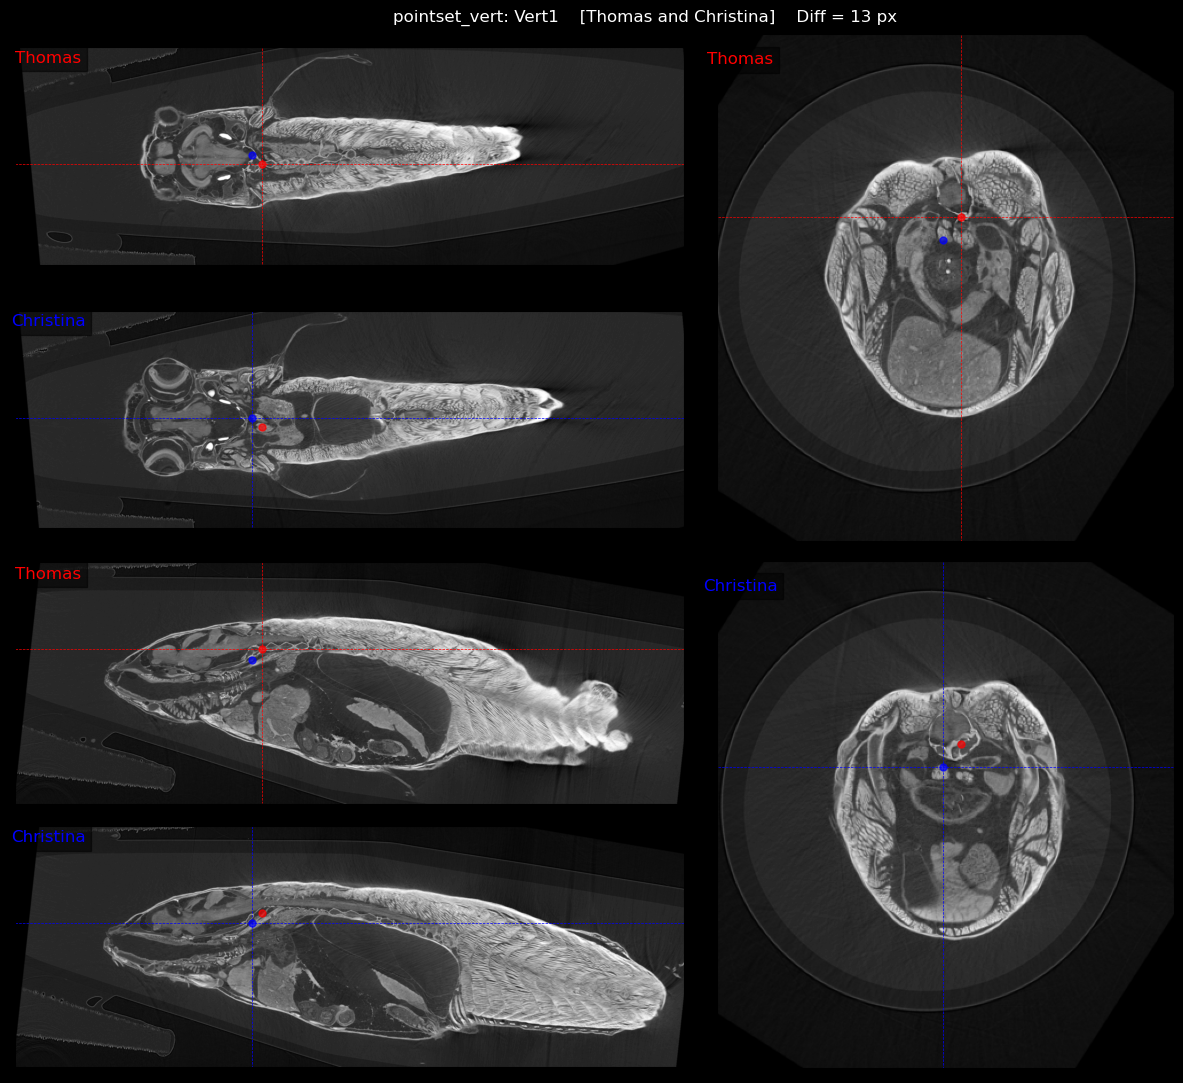

In [46]:
pointset_name = 'pointset_vert'
landmark_name = 'Vert1'

name1 = 'Thomas'
name2 = 'Christina'


make_landmarks_comparison_figure(im, [x,y,z], [x2,y2,z2], f'{pointset_name}: {landmark_name}', name1, name2)

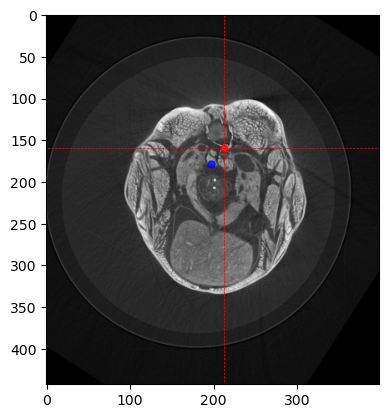

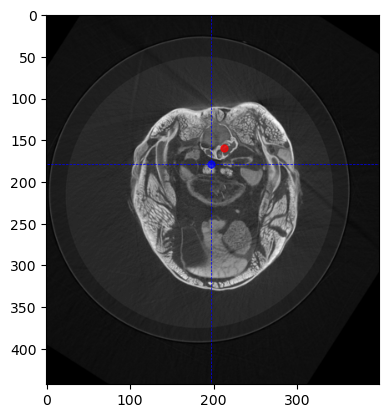

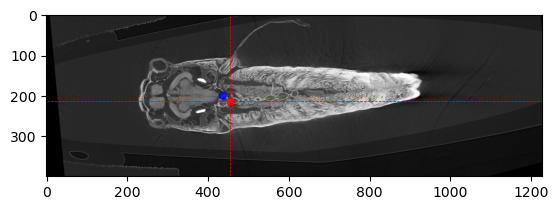

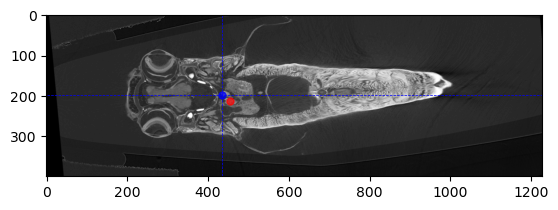

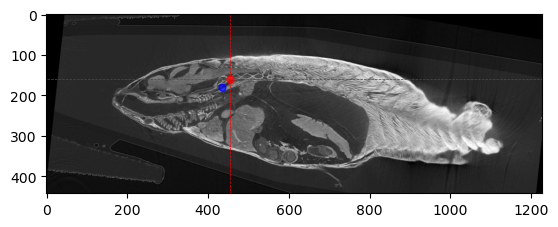

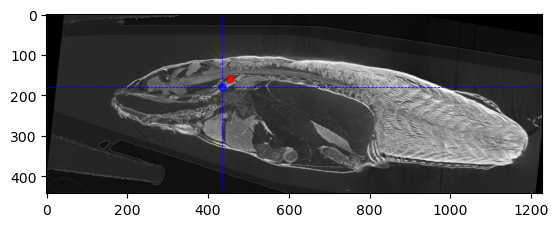

In [40]:
from matplotlib.gridspec import GridSpec

marker_size = 5
marker_alpha = 0.7
line_width = 0.5

if False:
    fig = plt.figure(layout="constrained")

    gs = GridSpec(4, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    # identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[2,0])
    ax4 = fig.add_subplot(gs[3, 0])

    ax5 = fig.add_subplot(gs[0:2, 1])
    ax6 = fig.add_subplot(gs[2:4, 1])

    for i, ax in enumerate(fig.axes):
        ax.set_xticks([])
        ax.set_yticks([])  

    fig.suptitle("GridSpec")

    plt.show()

#-------------------------
# Front 1
#-------------------------

plt.imshow(im[z], cmap='gray')
# Markers
plt.plot(x,y,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(x2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[2]-1], [y, y], 'r', linestyle = 'dashed', linewidth=line_width)
plt.plot([x, x], [0, im.shape[1]-1], 'r', linestyle = 'dashed', linewidth=line_width)
plt.show()

#-------------------------
# Front 2
#-------------------------

plt.imshow(im[z2], cmap='gray')
# Markers
plt.plot(x,y,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(x2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[2]-1], [y2, y2], 'b', linestyle = 'dashed', linewidth=line_width)
plt.plot([x2, x2], [0, im.shape[1]-1], 'b', linestyle = 'dashed', linewidth=line_width)
plt.show()

#-------------------------
# Top 1
#-------------------------
plt.imshow(im[:, y, :].T, cmap='gray')
plt.plot(z,x,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(z2,x2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[0]-1], [x, x], 'r', linestyle = 'dashed', linewidth=line_width)
plt.plot([z, z], [0, im.shape[2]-1], 'r', linestyle = 'dashed', linewidth=line_width)

plt.show()

#-------------------------
# Top 2
#-------------------------
plt.imshow(im[:, y2, :].T, cmap='gray')
plt.plot(z,x,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(z2,x2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[0]-1], [x2, x2], 'b', linestyle = 'dashed', linewidth=line_width)
plt.plot([z2, z2], [0, im.shape[2]-1], 'b', linestyle = 'dashed', linewidth=line_width)

plt.show()

#-------------------------
# Side 1
#-------------------------
plt.imshow(im[:, :, x].T, cmap='gray')
plt.plot(z,y,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(z2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[0]-1], [y, y], 'r', linestyle = 'dashed', linewidth=line_width)
plt.plot([z, z], [0, im.shape[1]-1], 'r', linestyle = 'dashed', linewidth=line_width)

plt.show()

#-------------------------
# Side 2
#-------------------------
plt.imshow(im[:, :, x2].T, cmap='gray')
plt.plot(z,y,'ro', markersize=marker_size, alpha=marker_alpha)
plt.plot(z2,y2,'bo', markersize=marker_size, alpha=marker_alpha)

# Lines
plt.plot([0, im.shape[0]-1], [y2, y2], 'b', linestyle = 'dashed', linewidth=line_width)
plt.plot([z2, z2], [0, im.shape[1]-1], 'b', linestyle = 'dashed', linewidth=line_width)

plt.show()

#axs[1].imshow(np.fliplr(image_crop[:,:,int(image_crop.shape[2]/2)].T), cmap='gray')
#axs[2].imshow(np.fliplr(image_crop[:,int(image_crop.shape[1]/2),:].T), cmap='gray')

In [273]:
pointset = all_landmarks[1]
print(pointset)

df_pointset = df[(df['point_set'] == pointset['file_name'])]
df_pointset

{'name': 'Fins', 'file_name': 'pointset2_fins', 'landmarks': ['Pectoral_dorsal most breast fin to body connection 1_right', 'Pectoral_dorsal most breast fin to body connection 2_left', 'Abdominal_fins back 1_right', 'Abdominal_fins back 2_left']}


,sample,point_set,name
2,1064,pointset2_fins,jo
3,1064,pointset2_fins,jvm
19,1071,pointset2_fins,jo
20,1071,pointset2_fins,jvm
36,1075,pointset2_fins,jo
...,...,...,...
2308,972,pointset2_fins,tc
2319,978,pointset2_fins,cs
2320,978,pointset2_fins,tc
2333,979,pointset2_fins,cs


In [326]:
samples_list = set(df_pointset['sample'].tolist())
#print(samples_list)

count_pairs  = 0
count_diff_size = 0

res = []

for s in tqdm(samples_list):
    #s = '1064'

    df_sample = df_pointset[df_pointset['sample']== s]
    #df_sample

    
    if len(df_sample) == 2:
        names = df_sample['name'].tolist() 
        
        fname1 = f"{s}_{pointset['file_name']}_{names[0]}.mps"
        fname2 = f"{s}_{pointset['file_name']}_{names[1]}.mps"
        
        
            #print(f"{df_pointset.loc[i]['sample']}_{df_pointset.loc[i]['point_set']}_{df_pointset.loc[i]['name']}.mps")

        land1 = read_landmarks(data_path / fname1)
        land2 = read_landmarks(data_path / fname2)
        
        if (len(land1) != len(land2)):
            #print(s, len(land1), len(land2))
            count_diff_size = count_diff_size + 1
            continue
                  
        m = [get_distance(land1[i], land2[i]) for i in range(len(pointset['landmarks']))]
        #print(m)
        res.append(m)
         
        #print(s, names)
        count_pairs=count_pairs+1
        
        if names[0] == names[1]:
            print('WARNING: The same names')
            
print('Pairs:',count_pairs)
print('Different number of landmarks:',count_diff_size)

res = np.array(res)
print(res.shape)

100%|███████████████████████████████████████████████████████████████████████████████| 181/181 [00:00<00:00, 225.69it/s]

Pairs: 137
Different number of landmarks: 2
(137, 4)


In [327]:
for i in range(len(pointset['landmarks'])):
    print(f"{pointset['landmarks'][i]}. mean: {round(np.mean(res[:,i]),1)}, std: {round(np.std(res[:,i]),1)}")

Pectoral_dorsal most breast fin to body connection 1_right. mean: 20.2, std: 15.3
Pectoral_dorsal most breast fin to body connection 2_left. mean: 26.6, std: 77.6
Abdominal_fins back 1_right. mean: 18.9, std: 8.3
Abdominal_fins back 2_left. mean: 38.3, std: 158.1


In [44]:
print_landmarks_count_for_pointsets()

pointset1_vert: 6 landmarks
pointset2_fins: 4 landmarks
pointset3_digest: 2 landmarks
pointset4_heart: 4 landmarks
pointset5_eyes: 11 landmarks
pointset6_skull_front: 8 landmarks
pointset7_skull_center: 7 landmarks
pointset8_skull_end: 6 landmarks
pointset9_brain: 10 landmarks


In [14]:
print(names.count('brain'))
print(names.count('fins'))

1
2


## Make the remaining of Eyes (Missing from Thomas, visualize results from Anna-Sophia, verify)

In [60]:
pointset = all_landmarks[4]
print(pointset)

{'name': 'Eyes', 'file_name': 'pointset5_eyes', 'landmarks': ['optic nerve head 1_right', 'optic nerve head 2_left', 'optic chiasm_crossing', 'most_anterior_right', 'most_anterior_left', 'most_posterior_right', 'most_posterior_left', 'most_dorsal_right', 'most_dorsal_left', 'most_ventral_right', 'most_ventral_left']}


,sample,point_set,name
8,1064,pointset5_eyes,kk
9,1064,pointset5_eyes,lucie
26,1071,pointset5_eyes,kk
27,1071,pointset5_eyes,lucie
44,1075,pointset5_eyes,kk
...,...,...,...
4003,974,pointset5_eyes,ast
4020,978,pointset5_eyes,ra
4021,978,pointset5_eyes,rs
4038,979,pointset5_eyes,ra


In [58]:
df_eyes = df_all_res[df_all_res['point_set'] == 'pointset5_eyes']
df_2 = df_eyes[df_eyes['name'] == 'ast']
samples = df_2['sample'].unique()
samples

array([ 601,  603,  605,  606,  608,  610,  613,  614,  619,  622,  626,
        629, 1149,  639,  640,  641,  649,  652, 1170,  660, 1185,  679,
        684, 1197,  685,  692,  699,  702,  707,  709,  710,  720,  721,
        837,  860,  863,  865, 1412, 1413,  966,  974], dtype=int64)

In [51]:
df[df['name'] == 'tc'].points_set.unique()

array(['pointset1_vert', 'pointset2_fins'], dtype=object)

In [49]:
df['name'].unique()

array(['jo', 'jvm', 'kk', 'tt', 'cs', 'tc', 'bew', 'vc', 'ra', 'ttt',
       'fins', 'kp', 'jf', 'brain'], dtype=object)

In [92]:
read_landmarks(data_path / '1064_pointset1_vert_JO.mps')

[array([410.68527946, 361.34097292, 837.83204157]),
 array([426.68527946, 318.24754659, 907.56993833]),
 array([424.81810551, 311.09290667, 963.36025574]),
 array([ 421.68527946,  308.14398353, 1020.22346386]),
 array([ 418.13282604,  311.98799983, 1076.01378127]),
 array([ 409.99999999,  318.95207945, 1136.04074874])]

In [148]:
read_landmarks(data_path / '1064_pointset1_vert_JO (1).mps')

[array([284.99999999, 262.78677778, 578.70023437]),
 array([291.18236118, 238.71703727, 618.7555187 ]),
 array([295.99999999, 227.14703661, 656.28763551]),
 array([300.99999999, 223.67768127, 692.55816857]),
 array([306.99999999, 221.15451376, 729.14409756]),
 array([311.99999999, 220.83911782, 766.04542249]),
 array([ 195.00365284,  366.0317758 , 1767.        ])]

In [60]:
filecmp.cmp(data_path / '1100_PointSet6_Skull_Front_RA.mps', data_path / '1100_PointSet6_Skull_Front_RA (1).mps')

True

In [31]:
[f for f in os.listdir(data_path) if os.path.isfile(f)]

[]

In [38]:
len([x for x in data_path.iterdir() if x.is_file()])

1816

## Testing: Read and Proccess filtering (manual, by biologists) 

In [1]:
from openpyxl import load_workbook

In [39]:
#wb = load_workbook('02_optic chiasm_crossing.xlsx')
wb = load_workbook('03_tongue tip.xlsx')
ws = wb.active

if ws['F1'].value == 'name1' and ws['G1'].value == 'name2':
    name1 = 'F'
    name2 = 'G'
elif ws['D1'].value == 'name1' and ws['E1'].value == 'name2':
    name1 = 'D'
    name2 = 'E'
else:
    print('Error with data columns')
    
print(name1, name2)

D E


In [44]:
cells_count = len(ws[name1])

for i in range(cells_count):
    if ws[f'{name1}{i+1}'].font.color != None:
        if ws[f'{name1}{i+1}'].font.color.rgb == 'FFFF0000':
            print(ws[f'{name1}{i+1}'].value)

jo
ra
jo
jo
ra
ra
jo
jo
ra
jo
ra
ra
ra
ra
ra
jo
ra
jo
ra
ca
jo
ra
ca
jo
ra
ca
jo
ca
ca
ca
ca


In [41]:
len(ws['F'])

177

In [26]:
ws['G2'].font.color.rgb == 'FFFF0000'

True

In [3]:
files = os.listdir('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\data\\')  

In [6]:
files[0].split('.')[0]

['1064', 'tif']

In [8]:
for f in files:
    print(f.split('.')[0])

1064
1071
1075
1076
1081
1082
1086
1100
1104
1105
1106
1119
1126
1129
1131
1134
1149
1155
1157
1170
1181
1184
1185
1191
1192
1197
1216
1217
1219
1222
1226
1227
1230
1232
1234
1248
1256
1257
1258
1264
1265
1269
1273
1274
1282
1284
1285
1291
1292
1293
1295
1296
1297
1300
1305
1310
1320
1321
1323
1337
1338
1341
1346
1351
1353
1362
1363
1366
1369
1370
1372
1376
1378
1380
1383
1384
1385
1389
1391
1393
1394
1395
1396
1399
1400
1401
1404
1405
1406
1412
1413
1414
1417
1418
1423
417
418
421
423
425
428
444
446
448
454
459
463
470
471
475
488
489
493
500
501
502
508
509
511
526
528
531
535
537
547
555
561
565
578
582
586
601
603
605
606
608
610
613
614
619
622
626
629
639
640
641
649
652
660
679
684
685
692
699
702
707
709
710
720
721
724
800
801
803
804
805
807
809
811
814
816
818
819
820
824
826
828
831
834
837
838
841
843
844
846
849
853
854
856
859
860
863
865
870
871
876
879
880
883
890
891
893
906
909
912
913
914
919
946
947
951
954
955
956
960
961
966
971
972
974
978
979
Thumbs
